# Lab 1

# Business Understanding

### Describe the purpose of the data set you selected 
- *Why was this data collected in the first place?* - The data set selected is the "UNSW_NB15" network traffic data set. The data set was created to evalutate Network Intrusion Detection Systems (NIDS). According to the creators of the data set, N. Moustafa and J. Slay from the Australian Defence Force Academy, the "quality of a NIDS data set reflects two important characteristics: comprehensive reflection of contemporary threats and an inclusive normal range of traffic [1]." Before this data set was generated, they argued that existing data sets used to train and test NIDS were not representative of current traffic flows and threats.
- Describe how you would define and measure the outcomes from the dataset. That is: 
    - *Why is this data important?* - The importance of this data set is that it will allow NIDS to be evaluted better, which will increase their performance, increase their protective power and reduce the chance of false positives and false negatives.
    - *How do you know if you have mined useful knowledge from the dataset?* - We will know we mined useful knowledge from the data set if we can determine, based on a collection of packets of traffic data, whether the features of those packets indicate an attack or just normal traffic.
    - *How would you measure the effectiveness of a good prediction algorithm? Be specific.* - Finding a model that predicts from the network traffic whether an attack is occuring or not, and, if there is an attack, which category of attack if occuring, will measure the effectiveness of the model. Determining if an attack is occuring is the basis of the model and with refinement, we will try to search for categorizing the attack.

# Data Understanding

In [9]:
# Imports
from pandas.tools.plotting import scatter_matrix
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
pd.set_option('display.max_columns', None)    # set the max columns to show to unlimited

%matplotlib inline

In [2]:
# Load UNSW_NB15 into a Pandas dataframe
df = pd.read_csv('UNSW_NB15_training_set.csv')

### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

## UNSW_NB15_training_set
- A Network Intrusion Data Set.
    - 82332 rows x 45 columns
        - **id** *int* The id of the record
        - **dur** *float* Record's total duration
        - **proto** *Nominal* Tranaction Protocol
        - **service** *Nominal* http, ftp, ssh, dns, ..., else(-)
        - **state** *Nominal* The state and its dependent protocol e.g. ACC, CLO, FIN, INT, ..., else (-)
		- **spkts** *int* Source to destination packet count
		- **dpkts** *int* Destination to source packet count 
		- **sbytes** *int* Source to destination bytes
		- **dbytes** *int* Destination to source bytes
		- **rate** *float* We were unable to find a description of rate. It does contain outliers, but we were unable to find reason to throw it out. So we kept it at any *rate*
		- **sttl** *int* Source to destination bytes
		- **dttl** *int* Destination to source time to live
		- **sload** *float* Source bits per second
		- **dload** *float* Destination bits per second
		- **sloss** *int* Source packets retransmitted or dropped
		- **dloss** *int* Destination packets retransmitted or dropped
		- **sinpkt** *float* Source inter-packet arrival time(mSec)
		- **dinpkt** *float* Destination inetr-packet arrival time(mSec)
		- **sjit** *float* Source jitter (mSec)
		- **djit** *float* Destination jitter(mSec)
		- **swin** *int* Source TCP window advertisment
		- **stcpb** *int* Source TCP sequence number
		- **dtcpb** *int* Destination TCP sequence number
		- **dwin** *int* Destination TCP window advertisment
		- **tcprtt** *float* The sum of 'synack' and 'ackdat' of the TCP
		- **synack** *float* The time between the SYN and the SYN_ACK packets of the TCP
		- **ackdat** *float* The time between the SYN_ACK and the ACK packets of the TCP
		- **smean** *int* Mean of the flow packet size transmitted by the sre
		- **dmean** *int* Mean of the flow packet size transmitted by the dst
		- **trans_depth** *int* The depth into the connection of the http request/response transaction
		- **response_body_len** *int* The content size of the data transferred from the server's http service
		- **ct_srv_src** *int* No. of Connection that contain the same service (14) and source address in 100 connections according to the last time
		- **ct_state_ttl** *int* No. for each state (6) according to specific range if value for source/destination time to live
		- **ct_dst_ltm** *int* No of connectiuon of the same destination address (3) in 100 connections according to the last time
		- **ct_src_dport_ltm** *int* No. of connection of the same source address and the destination port in 100 connections according to the last time
		- **ct_dst_sport_ltm** *int* No. of connnection of the same destination address(3) and the source port (2) in 100 connection according to the last time (26).
		- **ct_dst_src_ltm** *int* No connection of the same cource (1) and the destination (3) address in 100 connection according to the last time (26)
		- **is_ftp_login** *byte* If the ftp session is accessed by user and password then 1 else 0
		- **ct_ftp_cmd** *int* No. of flows that has a command in ftp session
		- **ct_flw_http_mthd** *int* No. of flows that has methof such as Get and Post in http service
		- **ct_src_ltm** *int* No of connections of the same source address (1) in 100 connection according to the last time(26).
		- **ct_srv_dst** *int* No. of connectio that conbtain the same service and destination address in 100 connection according to the last time
		- **is_sm_ips_ports** *byte* If source equals to destination (3) IP addresses and port numbers (2)(4) are equal, this variable takes value 1 else 0
		- **attack_cat** *Nominal* The name of each attack category. In this data set, nine categories (e.g. Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms)
		- **label** *byte* 0 for normal and 1 for attack records

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
﻿id                  82332 non-null int64
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-n

In [19]:
# df.describe() calculates the count, mean, standard deviation, min, max, and quartiles 
# of the data less the nominal (object) columns. 
df.describe()

,﻿id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557928,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052595,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


Summary statistics above are for numeric data types with a totoal of 41 features. The count of 82332 indicate no missing data.

Binary Data types are **is_sm_ips_ports, is_ftp_login, label**:
- **is_sm_ips_ports** Min = 0, Max = 1, which is what I would expect as it is binary in nature
- **is_ftp_login** Min = 0, Max = 2, We wouldn't expect max = 2 for this feature (Marked as anomalous, see section on data quality for explanation)
- **label** Min = 0, Max = 1, which is what we would expect as it is binary in nature where 0 means it is a normal packet, while 1 means it is an attack record (or abnormal)

In [26]:
# List the unique values of each nominal column
header = df.columns.values.tolist()
for column in header:
    if column in df.select_dtypes(include=["object"]):
        print column + ":\n", df[column].unique()

proto:
['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' 'ptp' 'fire' 'crtp' 'crudp' 'sccop

In [54]:
# Summary statistics on the categrical features in our dataset.
df.describe(include=['O'])

,proto,service,state,attack_cat
count,82328,82328,82328,82328
unique,131,13,7,10
top,tcp,-,FIN,Normal
freq,43091,47153,39335,37000


### Verify data quality: Explain any missing values, duplicate data, and outliers.
    - Are those mistakes? How do you deal with these problems? Be specific.

In [43]:
""" There are four records that we found that do not fit with the given feature definitions. 
 The feature "is_ftp_login" is a "byte" field. Investigating the data, we found that these 
 four records are identical to each other. The feature definition states that if the ftp 
 session is accessed by user and password then the record will have a one, otherwise a zero. 
 We are unable to determine whether these records used and ftp username and password, and 
 since they are only four out of 82k records (4 / 82332 = 4.85 * 10^(-5)) we thought that 
 eliminating them from the data set was the best choice with minimal impact.
"""
df[df.is_ftp_login == 2]

,﻿id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
9434,9435,0.448151,tcp,ftp,FIN,10,10,602,690,42.396425,62,252,9675.310547,11085.54981,1,3,49.794555,30.815,70.163992,1692.426333,255,158848246,992060022,255,0.0,0.0,0.0,60,69,0,0,2,1,4,2,2,4,2,2,0,4,2,0,Exploits,1
11136,11137,0.448151,tcp,ftp,FIN,10,10,602,690,42.396425,62,252,9675.310547,11085.54981,1,3,49.794555,30.815,70.163992,1692.426333,255,158848246,992060022,255,0.0,0.0,0.0,60,69,0,0,2,1,4,2,2,4,2,2,0,4,2,0,Exploits,1
11139,11140,0.448151,tcp,ftp,FIN,10,10,602,690,42.396425,62,252,9675.310547,11085.54981,1,3,49.794555,30.815,70.163992,1692.426333,255,158848246,992060022,255,0.0,0.0,0.0,60,69,0,0,2,1,4,2,2,4,2,2,0,4,2,0,Exploits,1
11811,11812,0.448151,tcp,ftp,FIN,10,10,602,690,42.396425,62,252,9675.310547,11085.54981,1,3,49.794555,30.815,70.163992,1692.426333,255,158848246,992060022,255,0.0,0.0,0.0,60,69,0,0,2,1,4,2,2,4,2,2,0,4,2,0,Exploits,1


In [45]:
# Overwrite the existing dataframe with the new dataframe that does not contain the 
# four unwanted records and confirm we have 4 less records
df = df[df.is_ftp_login != 2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Data columns (total 45 columns):
﻿id                  82328 non-null int64
dur                  82328 non-null float64
proto                82328 non-null object
service              82328 non-null object
state                82328 non-null object
spkts                82328 non-null int64
dpkts                82328 non-null int64
sbytes               82328 non-null int64
dbytes               82328 non-null int64
rate                 82328 non-null float64
sttl                 82328 non-null int64
dttl                 82328 non-null int64
sload                82328 non-null float64
dload                82328 non-null float64
sloss                82328 non-null int64
dloss                82328 non-null int64
sinpkt               82328 non-null float64
dinpkt               82328 non-null float64
sjit                 82328 non-null float64
djit                 82328 non-null float64
swin                 82328 non-n

### Outliers

In [58]:
# using += 1.5 IQR to determine outliers from continous/oridnal numbers. 
df_desc_table = df.describe() # result: 41 numeric types
col_rate = df_desc_table['rate']
df_sub2 =df[['rate']]

q1 = df_desc_table.iloc[4]['rate']  # 4 = 25% row of description table or Q1
q3 = df_desc_table.iloc[6]['rate']  # 6 = 75% row of description table or Q3
iqr = q3 - q1
upper_outlier_threshold = q3 + (1.5 * iqr) 
lower_outlier_threshold = q1 - (1.5 * iqr)

col_index = df.columns
col_index.get_values() # Returns an array of column names 
col = df['rate']
lower_outliers = col[col < lower_outlier_threshold]
upper_outliers = col[col > upper_outlier_threshold]

print "Number of observations", len(col)
print "Number of lower outliers", len(lower_outliers)
print "Number of upper outliers", len(upper_outliers)

Number of observations 82328
Number of lower outliers 0
Number of upper outliers 6201


In [61]:
# Code that calculates the number of outliers below and above for continous numeric features.
# this is to help determine which particular feature to do box plots on.
#ref: http://stackoverflow.com/questions/24901766/python-how-to-get-column-names-from-pandas-dataframe-but-only-for-continuous
df_cont = df.select_dtypes(['float64', 'int64']) # a data frame of just continous variables
### len(df_cont.columns)
#df_cont.drop('id', axis=1, inplace=True) # 1 is the axis number ( 0 for rows 1 for columns), dropping id as it doesn't make sense to plot outliers for that column
### len(df_cont.columns)
print "Column name: #obserations: #lower_outliers: #upper_outliers: Max Values"
num_features_with_outliers = 0
for col_name in df_cont.columns:
    q1 = df_desc_table.iloc[4][col_name]  # 4 = 25% row of description table or Q1
    q3 = df_desc_table.iloc[6][col_name]  # 6 = 75% row of description table or Q3
    max_val = df_desc_table.iloc[7][col_name] # 7 = max value
    iqr = q3 - q1
    upper_outlier_threshold = q3 + (1.5 * iqr) 
    lower_outlier_threshold = q1 - (1.5 * iqr)
    col = df[col_name]
    lower_outliers = col[col < lower_outlier_threshold]
    upper_outliers = col[col > upper_outlier_threshold]
    if (len(lower_outliers) + len(upper_outliers)) > 0:
        num_features_with_outliers+=1
        print col_name + ": " + str(len(col)) + " : " + str(len(lower_outliers)) + " : " + str(len(upper_outliers)) + " : " + str(max_val)
print "Number of features with outliers: " + str(num_features_with_outliers)

Column name: #obserations: #lower_outliers: #upper_outliers: Max Values
dur: 82328 : 0 : 5868 : 59.999989
spkts: 82328 : 0 : 10196 : 10646.0
dpkts: 82328 : 0 : 8907 : 11018.0
sbytes: 82328 : 0 : 9270 : 14355774.0
dbytes: 82328 : 0 : 12308 : 14657531.0
rate: 82328 : 0 : 6201 : 1000000.003
sload: 82328 : 0 : 6715 : 5268000256.0
dload: 82328 : 0 : 18112 : 20821108.0
sloss: 82328 : 0 : 5499 : 5319.0
dloss: 82328 : 0 : 11272 : 5507.0
sinpkt: 82328 : 0 : 5667 : 60009.992
dinpkt: 82328 : 0 : 4717 : 57739.24
sjit: 82328 : 0 : 6320 : 1483830.917
djit: 82328 : 0 : 8569 : 463199.2401
tcprtt: 82328 : 0 : 2019 : 3.821465
synack: 82328 : 0 : 2954 : 3.226788
ackdat: 82328 : 0 : 2480 : 2.928778
smean: 82328 : 0 : 11928 : 1504.0
dmean: 82328 : 0 : 9902 : 1500.0
trans_depth: 82328 : 0 : 7582 : 131.0
response_body_len: 82328 : 0 : 5657 : 5242880.0
ct_srv_src: 82328 : 0 : 10093 : 63.0
ct_state_ttl: 82328 : 0 : 1833 : 6.0
ct_dst_ltm: 82328 : 0 : 10479 : 59.0
ct_src_dport_ltm: 82328 : 0 : 11476 : 59.0
ct_ds

Based on the code above there are 33 features with outliers based on 1.5IQR standard. Note: Results were pulled out into excel to sort on number of outliers and max value to try and triage which variables to look at. Interesting to note: there were no lower outliers, just upper outliers. The top 5 features based on large number of outliers are [feature name (number of outliers)]: dload (18112) ct_dst_src_ltm (12789) dbytes(12308) smean(11928) ct_src_dport_ltm(11476)

Sorting by max_value will help to do box plots for variables with similar magnitude: E.g. 'dpkts', 'spkts' are similir in max value 'dloss', 'sloss' are similar in max value 'ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm' are similar in max vax value

Looking at the histogram and boxplot for dpkts and spkts (below), there seems to be a lot of values very close to 0 and they seem to track each other in quantity. I wouldn't be surprised if they were highly correlated. They have very similar steep central distribution centered around 0. With the network setup I wouldn't expect packets to have more than 6 hops based on the network setup. Based on the summary statistics, 75% the dpkts and spkts have greater than 12, 10 respectively with max values of 10646.000000 11018.000000, respectively. It would be interesting to see if there may be any correlation with these values greater than 75% of the norm correlate to abnormal traffic. *See Explore relationships for further analysis with these particular features*. (Pearson Correlation heat map shows value of .37 , which indicates some postive correlation of small to medium strength). From an outlier perspective, however, it is not clear whether these packets are expected anomolies, or errors in recording. Will leave them in the dataset for now.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C283C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C4FDF98>]], dtype=object)

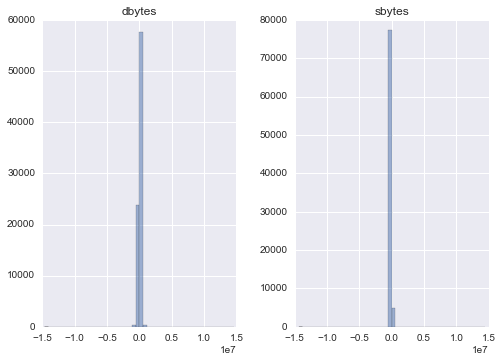

In [55]:
df[['dbytes', 'sbytes']].diff().hist(alpha=0.5, bins=50)

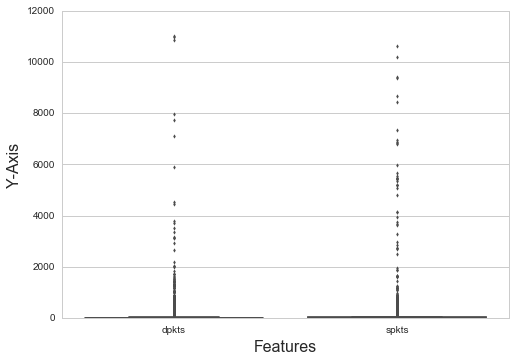

In [56]:
#Set up the graph parameters
sns.set(context='notebook', style='whitegrid')
sns.axlabel(xlabel="Features", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=df[['dpkts', 'spkts']] , fliersize=3) # api: https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html

In [63]:
""" Compare the percentage of destination to source packets for Attack and for
    Normal traffic. We can see that Normal traffic accounts for nearly 70% of
    the destination to source packets that are sent, while Attack only produce
    destination to source packets 30% of the time. 
"""
denom = df[(df['dpkts'] > 10)]
numerator = df[(df['dpkts'] > 10) & (df['label'] == 1)]
print "Percent of packets that have dpkts > 10 and is labelled as an 'Attack' = " + str((float(len(numerator))/len(denom)) * 100)
numerator  = df[(df['dpkts'] > 10) & (df['label'] == 0)]
print "Percent of packets that have dpkts > 10 and 'Normal' = " + str((float(len(numerator))/len(denom)) * 100)

Percent of packets that have dpkts > 10 and is labelled as an 'Attack' = 30.4111342185
Percent of packets that have dpkts > 10 and 'Normal' = 69.5888657815


Features dloss and sloss are the source or destination packets retransmitted or dropped. 
dloss and sloss also see to have a lot of values near zero and also seem to have roughly the same amount. We would not be surprised to see these variables correlate to each other. They have very similar steep central distribution centered around zero

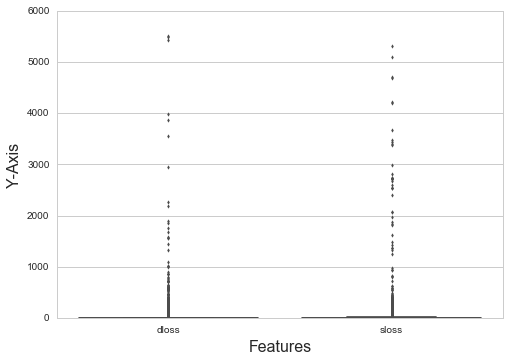

In [64]:
sns.axlabel(xlabel="Features", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=df[['dloss', 'sloss']] , fliersize=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA11240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA60F28>]], dtype=object)

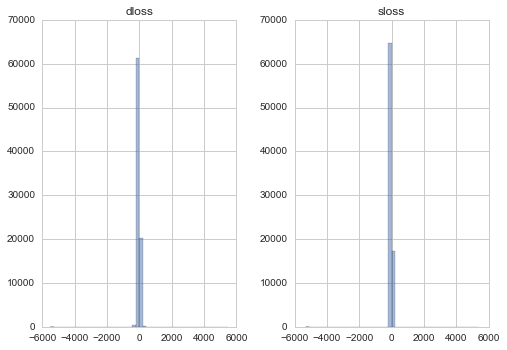

In [65]:
df[['dloss', 'sloss']].diff().hist(alpha=0.5, bins=50)

Features 'ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm' 
The features also seem to have a lot of values near 0 although slighly wider spread then previous features. Again, would not be surprised to see these variables correlate to each other. They have very similar steep central distribution centered around 0.

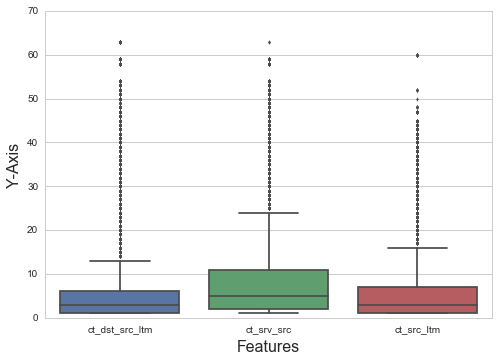

In [67]:
sns.axlabel(xlabel="Features", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=df[['ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm']] , fliersize=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012F05630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001355B2E8>]], dtype=object)

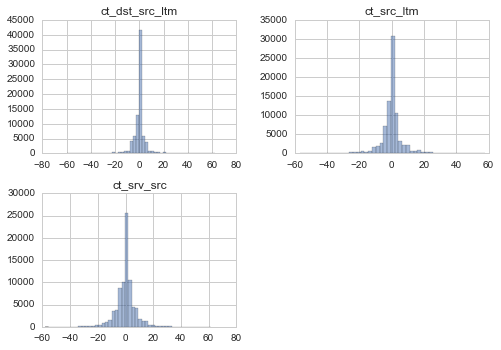

In [68]:
df[['ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm']].diff().hist(alpha=0.5, bins=50)

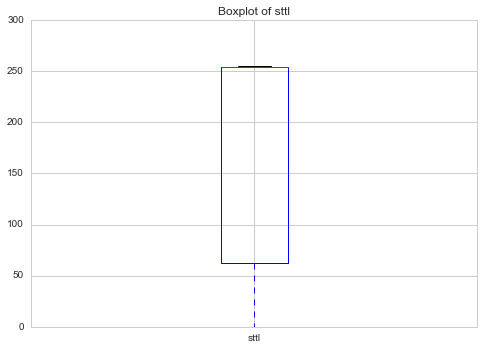

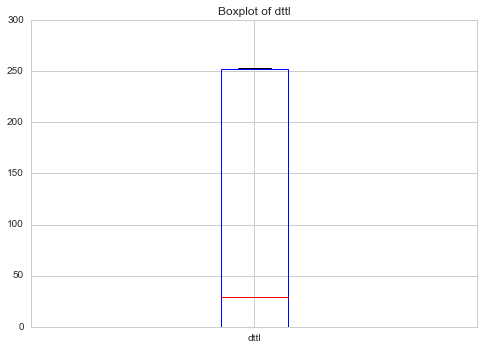

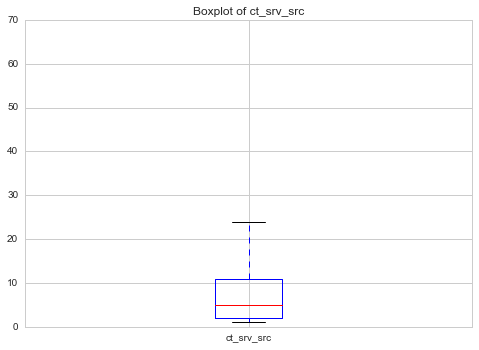

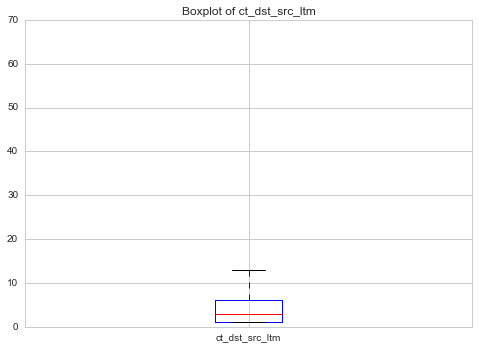

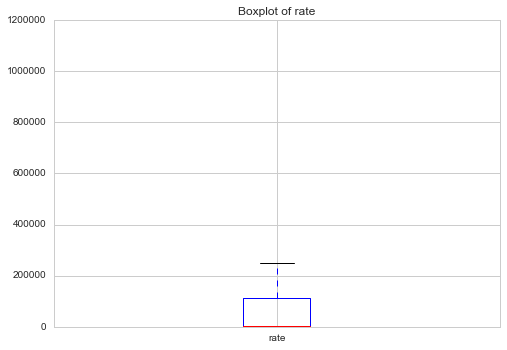

"\nplt.boxplot(x=[df.dttl],labels=['dttl'])\nplt.show()\n\nplt.boxplot(x=[df.ct_srv_src],labels=['ct_srv_src'])\nplt.show()\n\nplt.boxplot(x=[df.ct_dst_src_ltm],labels=['ct_dst_src_ltm'])\nplt.show()\n\nplt.boxplot(x=[df.rate],labels=['rate'])\nplt.show()\n"

In [71]:
""" Investigating the data, we find a lot of it is confined to ranges by the nature of the data (data 
    ranging from 0 to 255, etc.) As mentioned above, we did find continuous variables that did include 
    outliers, which we did decide to keep in the data set because we did not have a reason to throw 
    them out.
"""
# Five selected columns besides those above to get a "feel" for the data
columns = ["sttl", "dttl", "ct_srv_src", "ct_dst_src_ltm", "rate"]
for column in columns:
    plt.boxplot(x=[df[column]], labels=[column])
    plt.title("Boxplot of " + column)
    plt.show()

###  Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. 
    - Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful. 

In [ ]:
# Daniel 
# explain the five we chose

### Visualize the most important attributes appropriately (at least 5 attributes).
    - Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate. 

In [ ]:
# Boxplots - Ravi each of the five by attack label
# other visualizations as found

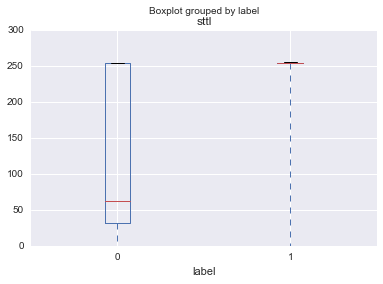

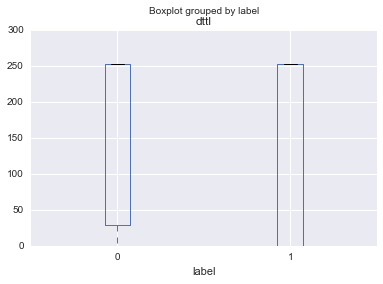

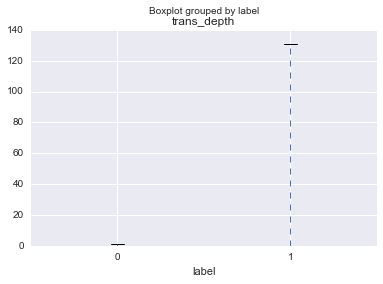

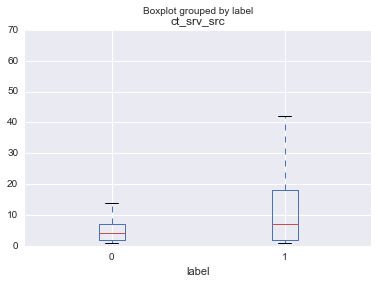

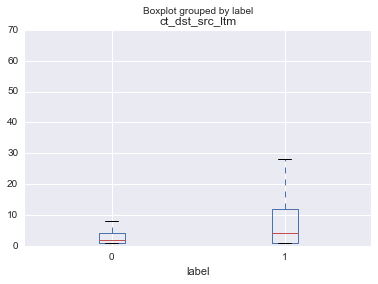

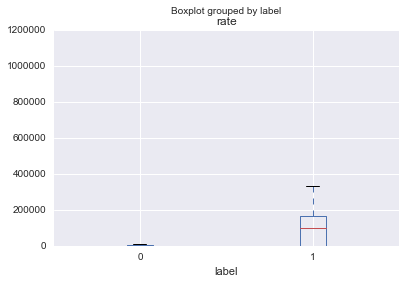

In [47]:
#sttl
df.boxplot(column="sttl", by="label")
#dttl
df.boxplot(column="dttl", by="label")
plt.show()
#trans_depth
df.boxplot(column="trans_depth", by="label")
#ct_srv_src
df.boxplot(column="ct_srv_src", by="label")
plt.show()
#ct_dst_src_ltm
df.boxplot(column="ct_dst_src_ltm", by="label")
#rate
df.boxplot(column="rate", by="label")
plt.show()

### Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. 
    - Explain any interesting relationships.

In [48]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

#attack records
df1_1 = df[['label', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss']]
df1_1 = df1_1[df1_1.label == 1]

df1_2 = df[['label', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb']]
df1_2 = df1_2[df1_2.label == 1]

df1_3 = df[['label', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'tcprtt']]
df1_3 = df1_3[df1_3.label == 1]

## normal records
df0_1 = df[['label', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss']]
df0_1 = df0_1[df0_1.label == 0]

df0_2 = df[['label', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb']]
df0_2 = df0_2[df0_2.label == 0]

df0_3 = df[['label', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'tcprtt']]
df0_3 = df0_3[df0_3.label == 0]


## both attack and normal records
df_1 = df[['label', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss']]
df_2 = df[['label', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'ct_src_dport_ltm', 'ct_dst_sport_ltm']]
df_3 = df[['label', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'tcprtt']]
df_4 = df[['label', 'sinpkt', 'dinpkt', 'synack', 'ackdat', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm','ct_src_dport_ltm', 'ct_dst_sport_ltm']]
df_5 = df[['label', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']]

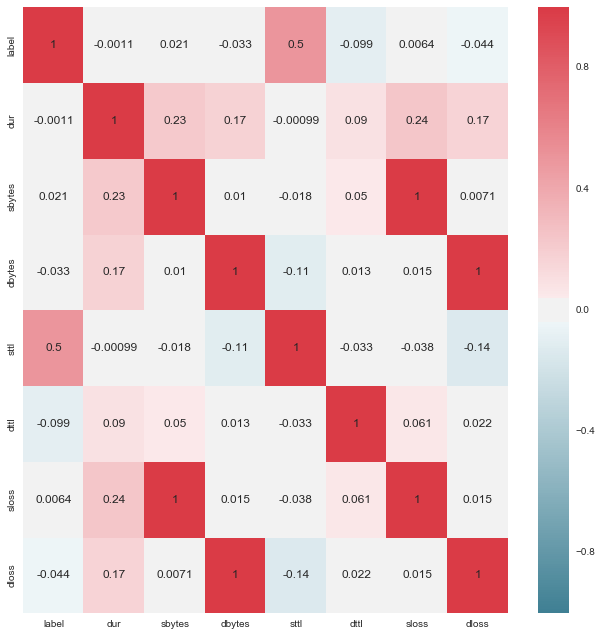

In [49]:
# NORMAL and ATTACK records

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_1.corr(), cmap=cmap, annot=True)

f.tight_layout()

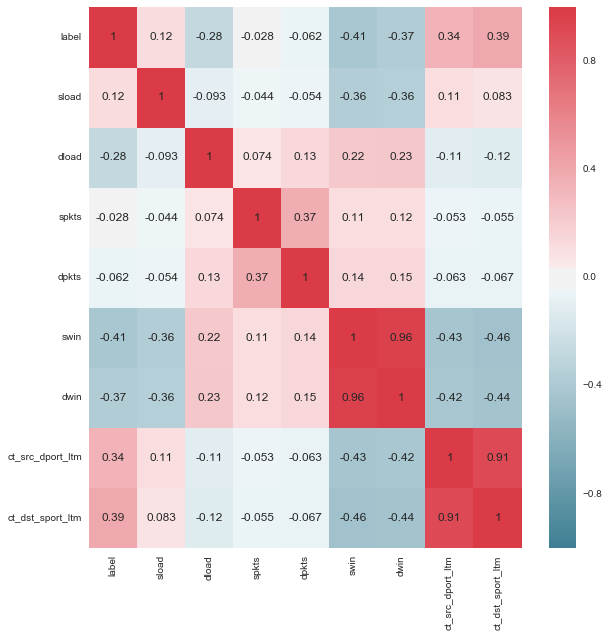

In [50]:
# NORMAL and ATTACK records

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_2.corr(), cmap=cmap, annot=True)

f.tight_layout()

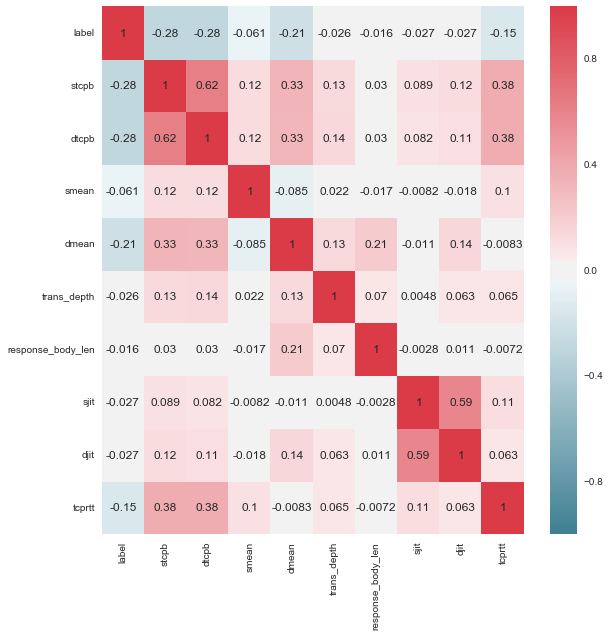

In [51]:
# NORMAL and ATTACK records

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_3.corr(), cmap=cmap, annot=True)

f.tight_layout()

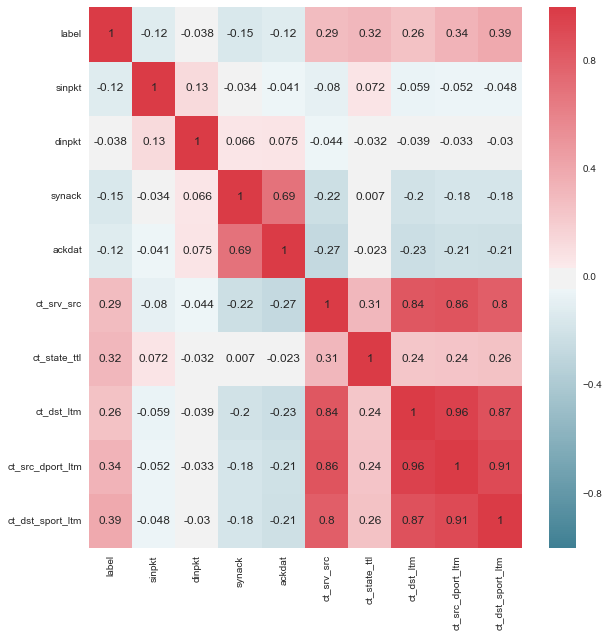

In [52]:
# NORMAL and ATTACK records

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_4.corr(), cmap=cmap, annot=True)

f.tight_layout()

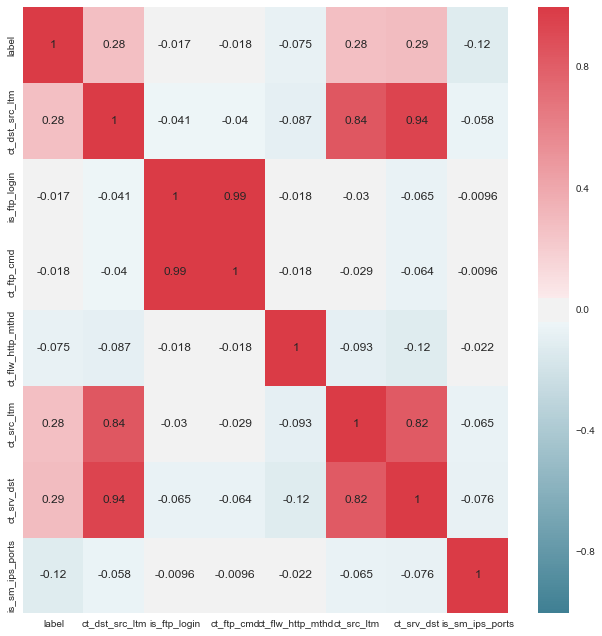

In [53]:
# NORMAL and ATTACK records

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_5.corr(), cmap=cmap, annot=True)

f.tight_layout()

### Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In [ ]:
# Randy

#positive correlation:
#    sttl : 0.5
#    ct_dst_sport_ltm : 0.39
#    ct_src_dport_ltm : 0.34
#negative correlation:
#    swin : 0.41
#    dwin : 0.37

## Randy - Do additional visualization to find something interesting
When it is attack, the swin value is either 0 or 255, where as normal traffic has ranges between 0 and 255 inclusive.
    - 30k attack records when swin/dwin is 0
    - 15k attack records when swin/dwin is 255
    
Next break down by attack categories - most are the generic category *(cipher attack)*

 ### Are there other features that could be added to the data or created from existing features? Which ones? 

In [ ]:
# team 

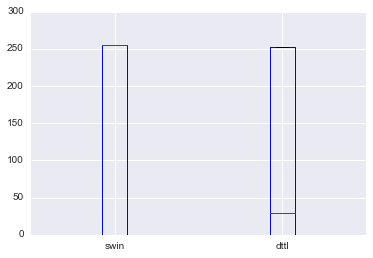

In [42]:
plt.boxplot(x=[df.swin, df.dttl], labels=["swin", "dttl"])
plt.show()